In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

* 生成數據集

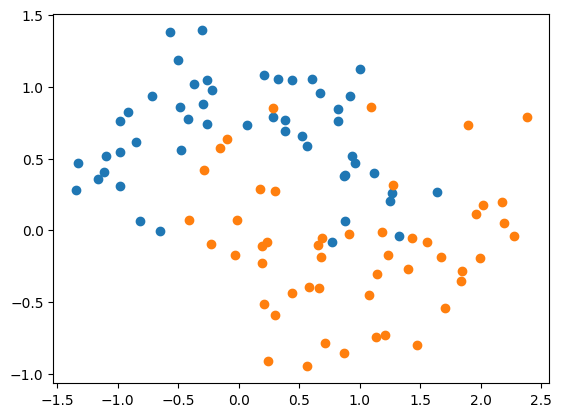

In [2]:
X, y = datasets.make_moons(noise=0.25,random_state=666)
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [3]:
# 封装绘图函数
def plot_decision_boundary(model, axis):
  
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
    np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


- 實戰————CART分類樹的sklearn實現

In [4]:
from sklearn.tree import DecisionTreeClassifier

C:\Users\acer\AppData\Local\Temp\ipykernel_17572\2290518181.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


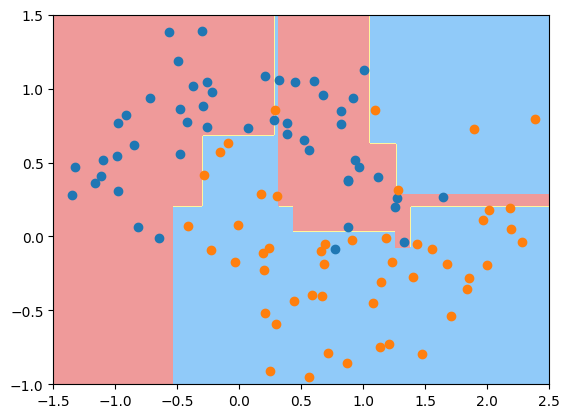

In [6]:
# 測試1
dt_clf1 = DecisionTreeClassifier()
dt_clf1.fit(X,y) #擬合
plot_decision_boundary(dt_clf1, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

可以看到上圖中，模型對某些數據過於看重，可能會出現過擬合，因此默認參數明顯是不行的

C:\Users\acer\AppData\Local\Temp\ipykernel_17572\2290518181.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


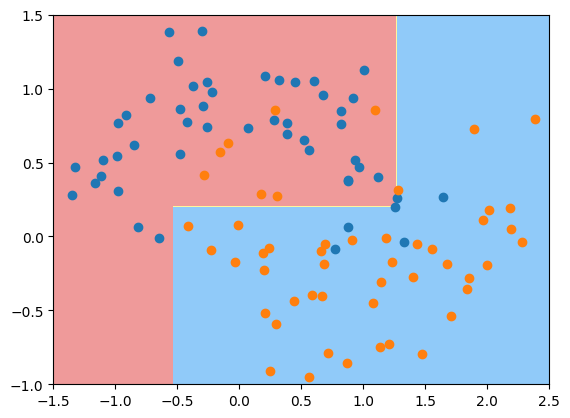

In [11]:
# 測試2
dt_clf2 = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=8) # 設置樹的決策深度和最大節點數
dt_clf2.fit(X,y) #擬合
plot_decision_boundary(dt_clf2, axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

雖然有一些數據分類錯誤，但明顯不會像上一張圖那樣呈現過擬合的效果